<a href="https://colab.research.google.com/github/Madhav2204/Digital-Image-Processing-and-Pattern-Rcognition-/blob/main/P5_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-05** 

# Image segmentation

In [ ]:
import cv2
import numpy as np

In [ ]:
# Loading the image in RGB
img = cv2.imread("/content/drive/MyDrive/image.png", 0)

In [ ]:
# Applying Gaussian blur with kernel size 7 to remove unwanted noise
blurred_image = cv2.GaussianBlur(img,(7,7),0)

In [ ]:
# Applying Otsu's thresholding to binarize the image
retval ,binarized_image = cv2.threshold(blurred_image,40,255,cv2.THRESH_BINARY)

In [ ]:
# Applying Closing to fill in the holes
filter = np.ones((3,3),np.uint8)
closed_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, filter)

# Using connected components to label the image
retval, markers = cv2.connectedComponents(closed_image)

# Mapping the component labels to hue val
label_hue = np.uint8(120*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])

In [ ]:
# changing from HSV to RGB again to show
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2BGR)

# background label set to black
labeled_image[label_hue==0] = 0

# getting the unique colors in the image
unique_colors = np.unique(labeled_image.reshape(-1, labeled_image.shape[2]), axis=0)


In [ ]:
print("Colors available in labeled image:")
for x in range(unique_colors.shape[0]):
    print(str(x+1)+"=> B:"+str(unique_colors[x,0])+"    G:"+str(unique_colors[x,1])+"   R:"+str(unique_colors[x,2])+" ")

print("\nSelect one of the colors and give its RGB values ")

Colors available in labeled image:
1=> B:0    G:0   R:0 
2=> B:0    G:255   R:0 
3=> B:255    G:0   R:0 

Select one of the colors and give its RGB values 


In [ ]:
r = input("B : ")
g = input("G : ")
b = input("R : ")

# making an output image
output_image = np.zeros_like(labeled_image)

B : 20
G : 40
R : 50


In [ ]:
# getting the object of user input color
for x in range(labeled_image.shape[0]):
    for y in range(labeled_image.shape[1]):
        if (labeled_image[x,y,0] == int(r) and labeled_image[x,y,1] == int(g) and labeled_image[x,y,2] == int(b)):
            output_image[x,y,0:3] = labeled_image[x,y,0:3]

-1

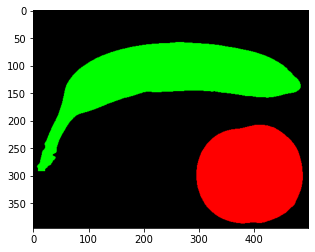

In [ ]:
# show the output image
import matplotlib.pyplot as plt
plt.imshow(labeled_image)
cv2.waitKey(0)

**Supervised Segmentation**
For this type of segmentation to proceed, it requires external input. This includes things like setting a threshold, converting formats, and correcting external biases.

## Thresholding
It is the simplest way to segment objects from background by choosing pixels above or below a certain threshold. This is generally helpful when we intend to segment objects from their background.

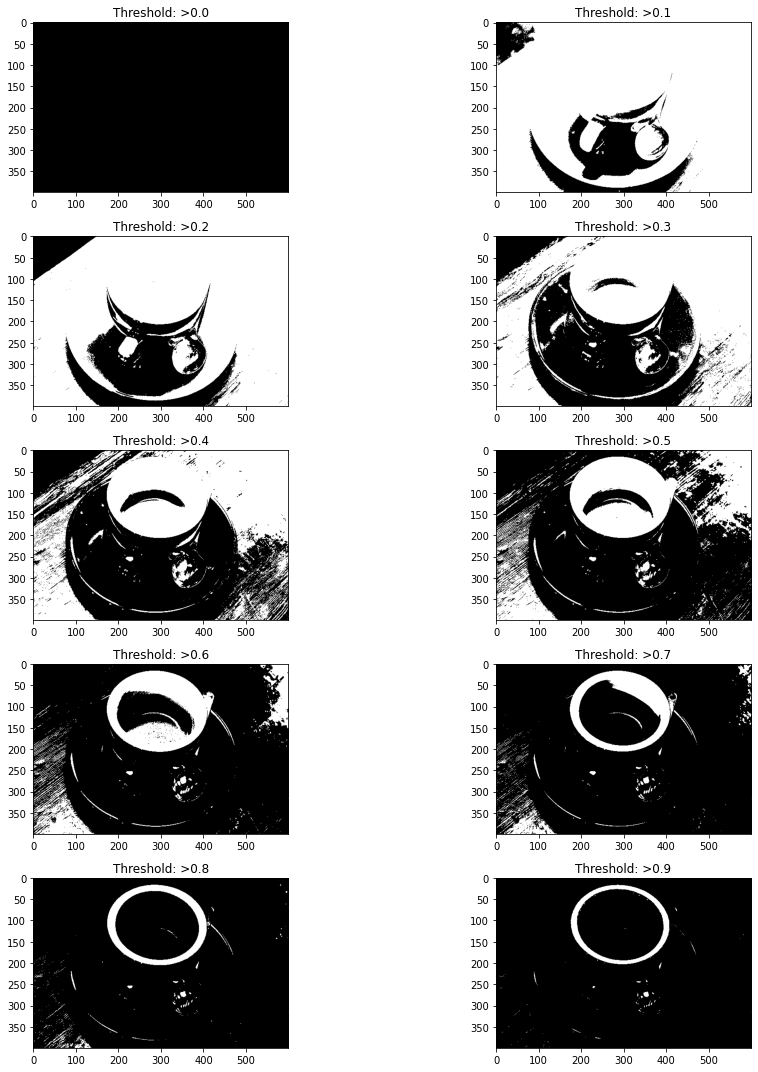

In [ ]:
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

plt.figure(figsize=(15, 15))
for i in range(10): # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)
  plt.title("Threshold: >"+str(round(i*0.1,1)))
  plt.imshow(binarized_gray, cmap = 'gray') #Displaying binarized image of various threshold

plt.tight_layout()

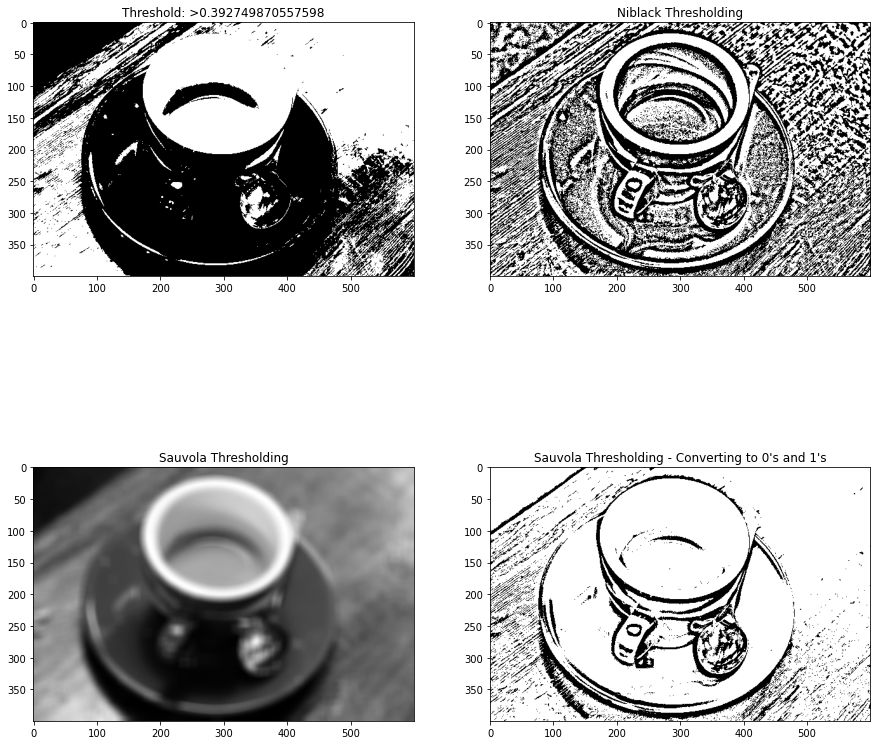

In [ ]:
plt.figure(figsize=(15, 15))
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)
 
threshold = filters.threshold_otsu(gray_coffee) # Computing Otsu's thresholding value
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
plt.imshow(binarized_coffee, cmap = "gray")
 
threshold = filters.threshold_niblack(gray_coffee) # Computing Ni black's local pixel
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
plt.imshow(binarized_coffee, cmap = "gray")

threshold = filters.threshold_sauvola(gray_coffee) # Computing Sauvola's local pixel threshold
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
plt.imshow(threshold, cmap = "gray")
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
plt.imshow(binarized_coffee, cmap = "gray")

### **Active Contour Segmentation:**

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [ ]:
# Sample Image of scikit-image package
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

In [ ]:
# Applying Gaussian Filter to remove noise
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)
 

In [ ]:
# Localising the circle's center at 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))
 
# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T
 
# Computing the Active Contour for the given image
astronaut_snake = active_contour(gray_astronaut_noiseless,snake)

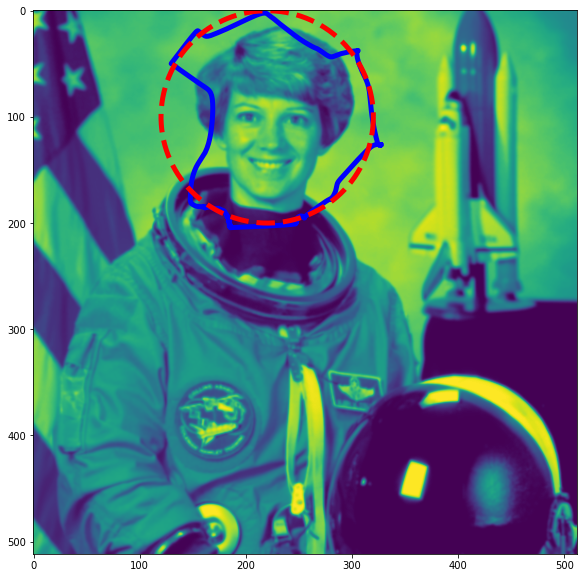

In [ ]:
fig = plt.figure(figsize=(10, 10))
 
# Adding subplots to display the markers
ax = fig.add_subplot(111)
 
# Plotting sample image
ax.imshow(gray_astronaut_noiseless)
# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0],
        astronaut_snake[:, 1],
        '-b', lw=5)
 
# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)
plt.show()

## **Submitted By : Madhav Shrivastava**

## **Enroll no.   : 19100BTCSBS05597**